<a href="https://colab.research.google.com/github/vimesh630/Stock-Price-Forecast-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup and Data Preparation

In [5]:
# Mount Google Drive for saving files
from google.colab import drive
drive.mount('/content/drive')

# Install yfinance (not pre-installed in Colab)
!pip install yfinance

# Import libraries
import yfinance as yf
import pandas as pd
import os

# Define stocks to predict (expanded list)
stocks = ["AAPL", "TSLA", "MSFT", "GOOGL", "AMZN", "NVDA"]

# Fetch 5 years of closing prices
data = {}
for stock in stocks:
    ticker = yf.Ticker(stock)
    data[stock] = ticker.history(period="5y")["Close"]

# Combine into a DataFrame
df = pd.DataFrame(data)

# Save raw data to Google Drive
df.to_csv("/content/drive/MyDrive/Individual_Projects/Stock_Price_Prediction/multi_stock_data_raw.csv")
print("Raw data saved to Drive!")

# Display first few rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Raw data saved to Drive!


,AAPL,TSLA,MSFT,GOOGL,AMZN,NVDA
Date,,,,,,
2020-03-18 00:00:00-04:00,59.861633,24.081333,134.387894,54.299900,91.500000,5.051887
2020-03-19 00:00:00-04:00,59.402958,28.509333,136.598984,55.319019,94.046501,5.304707
2020-03-20 00:00:00-04:00,55.631741,28.502001,131.468521,53.156361,92.304497,5.124867
2020-03-23 00:00:00-04:00,54.449894,28.952667,130.157166,52.455711,95.141502,5.297731
2020-03-24 00:00:00-04:00,59.912601,33.666668,141.987869,56.231663,97.004997,6.206633


Data Preprocessing

In [6]:
# Load raw data (optional if restarting Colab)
df = pd.read_csv("/content/drive/MyDrive/Individual_Projects/Stock_Price_Prediction/multi_stock_data_raw.csv", index_col="Date", parse_dates=True)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing values with forward fill (if any)
df.fillna(method="ffill", inplace=True)

# Add features: previous day's price and 7-day moving average
for stock in stocks:
    df[f"{stock}_Prev"] = df[stock].shift(1)  # Previous day's price
    df[f"{stock}_MA7"] = df[stock].rolling(window=7).mean()  # 7-day MA

# Drop rows with NaN from shifting/rolling
df.dropna(inplace=True)

# Save preprocessed data to Google Drive
df.to_csv("/content/drive/MyDrive/Individual_Projects/Stock_Price_Prediction/multi_stock_data_preprocessed.csv")
print("Preprocessed data saved to Drive!")

# Display first few rows
df.head()

Missing values:
 AAPL     0
TSLA     0
MSFT     0
GOOGL    0
AMZN     0
NVDA     0
dtype: int64
Preprocessed data saved to Drive!


<ipython-input-6-abb34077813a>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


,AAPL,TSLA,MSFT,GOOGL,AMZN,NVDA,AAPL_Prev,AAPL_MA7,TSLA_Prev,TSLA_MA7,MSFT_Prev,MSFT_MA7,GOOGL_Prev,GOOGL_MA7,AMZN_Prev,AMZN_MA7,NVDA_Prev,NVDA_MA7
Date,,,,,,,,,,,,,,,,,,
2020-03-26 00:00:00-04:00,62.717972,35.210667,149.425156,57.869328,97.774498,6.407395,59.582550,58.794193,35.950001,30.696096,140.628693,137.807755,54.818916,54.878700,94.292000,94.580571,6.117960,5.644454
2020-03-27 00:00:00-04:00,60.121307,34.290668,143.289642,55.248863,95.004997,6.295057,62.717972,58.831289,35.210667,32.154572,149.425156,139.079433,57.869328,55.014266,97.774498,95.081285,6.407395,5.822050
2020-03-30 00:00:00-04:00,61.837048,33.475334,153.368744,57.042782,98.197502,6.615378,60.121307,59.179016,34.290668,32.864001,143.289642,141.475113,55.248863,55.260518,95.004997,95.674285,6.295057,6.009289
2020-03-31 00:00:00-04:00,61.710842,34.933334,150.956665,57.821060,97.486000,6.565809,61.837048,60.047459,33.475334,33.782763,153.368744,144.259133,57.042782,55.926903,98.197502,96.414500,6.615378,6.215137
2020-04-01 00:00:00-04:00,58.463810,32.104000,145.596466,54.842796,95.385002,6.054444,61.710842,60.620876,34.933334,34.232953,150.956665,146.464748,57.821060,56.267915,97.486000,96.449285,6.565809,6.323239


Train the Model

X_train shape: (1000, 6)
y_train shape: (1000, 6)
AAPL MSE: 15.15
TSLA MSE: 159.98
MSFT MSE: 47.54
GOOGL MSE: 10.23
AMZN MSE: 12.52
NVDA MSE: 17.94


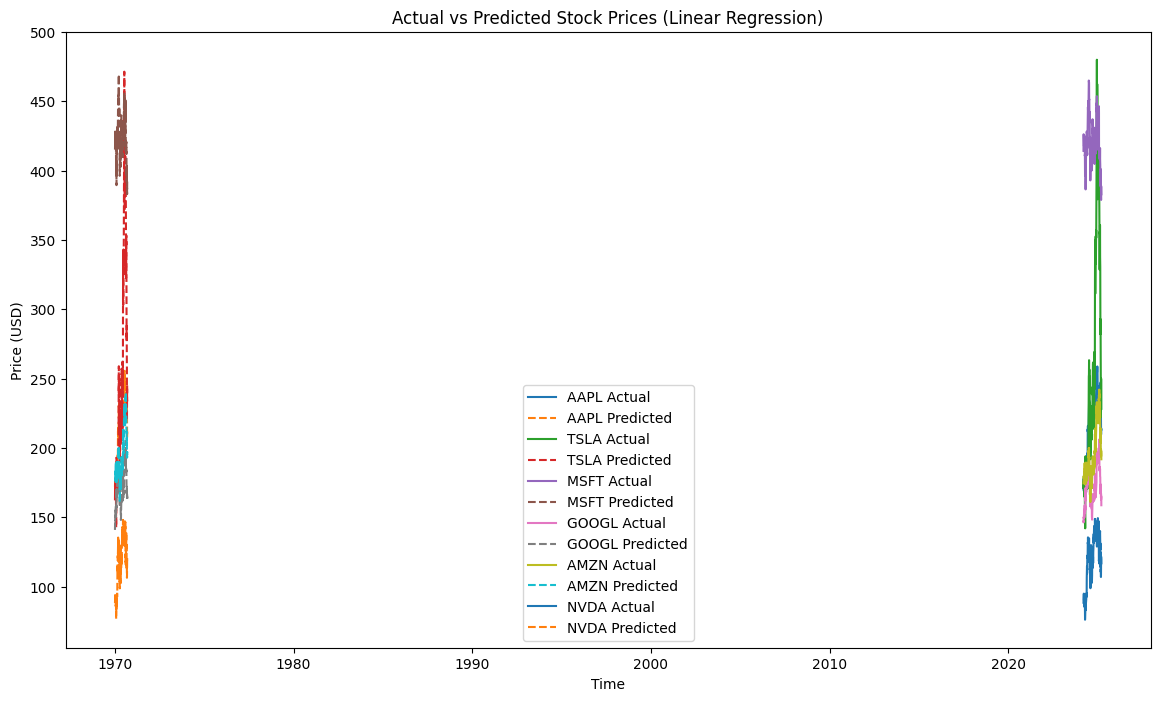

In [7]:
# Import libraries for training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define features (X) and targets (y)
feature_cols = [f"{stock}_Prev" for stock in stocks]  # e.g., ["AAPL_Prev", "TSLA_Prev", ..., "NVDA_Prev"]
X = df[feature_cols]
y = df[stocks]  # e.g., ["AAPL", "TSLA", "MSFT", "GOOGL", "AMZN", "NVDA"]

# Split data: 80% train, 20% test (no shuffle for time-series)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
predictions = model.predict(X_test)

# Evaluate with Mean Squared Error
mse = mean_squared_error(y_test, predictions, multioutput="raw_values")
for stock, error in zip(stocks, mse):
    print(f"{stock} MSE: {error:.2f}")

# Visualize actual vs predicted prices
plt.figure(figsize=(14, 8))  # Slightly larger figure for more stocks
for i, stock in enumerate(stocks):
    plt.plot(y_test[stock], label=f"{stock} Actual")
    plt.plot(predictions[:, i], label=f"{stock} Predicted", linestyle="--")
plt.title("Actual vs Predicted Stock Prices (Linear Regression)")
plt.xlabel("Time")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

Save the Model

In [8]:
# Import joblib for saving the model
import joblib

# Save the trained model to Google Drive
joblib.dump(model, "/content/drive/MyDrive/Individual_Projects/Stock_Price_Prediction/stock_model_linear.pkl")
print("Model saved to Drive!")

# Verify by loading and testing
loaded_model = joblib.load("/content/drive/MyDrive/Individual_Projects/Stock_Price_Prediction/stock_model_linear.pkl")
test_predictions = loaded_model.predict(X_test[:5])
print("Sample predictions from loaded model:\n", test_predictions)

Model saved to Drive!
Sample predictions from loaded model:
 [[172.04256459 162.23965461 415.086061   140.90635183 175.45634561
   88.34413813]
 [173.07161119 172.43339834 416.19003969 147.29643137 175.48564909
   88.90676743]
 [175.40632037 170.03620809 420.15363568 146.66231953 176.88485375
   89.8705649 ]
 [177.94146212 174.38461304 423.90690601 148.34527695 179.0851722
   90.83857453]
 [170.92517626 171.2448514  428.07571101 147.3210433  179.34297053
   91.98567635]]
